In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Collecting data

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Study Task/McDonalds Case Study/mcdonalds.csv")
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [ ]:
df.shape

(1453, 15)

In [ ]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [ ]:
df.select_dtypes(include='int').nunique()

Age    54
dtype: int64

In [ ]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [ ]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

object_cols= ['yummy','convenient',	'spicy','fattening','greasy',	'fast',	'cheap','tasty','expensive','healthy','disgusting','Gender']

label_encoder = LabelEncoder()

for col in object_cols:
    df[col]= label_encoder.fit_transform(df[col])

df.head(10)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,0
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,0
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,0
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,0
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,1
5,1,1,0,1,0,1,1,1,0,0,0,+2,55,Every three months,1
6,1,1,1,1,0,1,0,1,1,1,0,+2,56,Every three months,0
7,1,1,0,1,1,1,1,1,0,0,0,I love it!+5,23,Once a week,0
8,0,0,0,1,1,0,0,0,1,0,1,I hate it!-5,58,Once a year,1
9,1,1,0,1,1,1,0,1,1,0,0,+1,32,Every three months,0


In [ ]:
df['yummy'].value_counts()

1    803
0    650
Name: yummy, dtype: int64

In [ ]:
import pandas as pd

object_cols = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Gender']

# Calculate and display percentage distribution for specified object columns
for col in object_cols:
    col_percentage = df[col].value_counts(normalize=True) * 100
    print(f"\nPercentage distribution for '{col}' column:")
    print(col_percentage)



Percentage distribution for 'yummy' column:
1    55.264969
0    44.735031
Name: yummy, dtype: float64

Percentage distribution for 'convenient' column:
1    90.777701
0     9.222299
Name: convenient, dtype: float64

Percentage distribution for 'spicy' column:
0    90.640055
1     9.359945
Name: spicy, dtype: float64

Percentage distribution for 'fattening' column:
1    86.717137
0    13.282863
Name: fattening, dtype: float64

Percentage distribution for 'greasy' column:
1    52.64969
0    47.35031
Name: greasy, dtype: float64

Percentage distribution for 'fast' column:
1    90.020647
0     9.979353
Name: fast, dtype: float64

Percentage distribution for 'cheap' column:
1    59.876118
0    40.123882
Name: cheap, dtype: float64

Percentage distribution for 'tasty' column:
1    64.418445
0    35.581555
Name: tasty, dtype: float64

Percentage distribution for 'expensive' column:
0    64.211975
1    35.788025
Name: expensive, dtype: float64

Percentage distribution for 'healthy' column:
0 

**Inference:**
The percentage distributions provide valuable insights into the prevalence of certain characteristics within each column of the dataset. Notably, the 'yummy' column reveals that approximately 55.26% of respondents perceive McDonald's as 'yummy,' while 44.74% do not share this sentiment. The 'convenient' column indicates a substantial majority, with 90.78% finding McDonald's convenient. Similarly, the 'spicy' and 'fattening' columns demonstrate a prevailing inclination, with 90.64% considering McDonald's food non-spicy and 86.72% perceiving it as fattening. The 'greasy' column exhibits a relatively balanced distribution, with 52.65% finding the food greasy. Additionally, the 'fast' column highlights a strong consensus, as 90.02% of respondents view McDonald's as a fast-food option. 'Cheap' and 'tasty' columns depict varied perceptions, with 59.88% finding McDonald's cheap and 64.42% finding it tasty. 'Expensive' and 'healthy' columns show divided opinions, with 64.21% considering McDonald's not expensive and 80.11% not perceiving it as healthy. The 'disgusting' column reflects a sizable portion, as 75.71% of respondents do not find McDonald's disgusting. Lastly, the 'Gender' column indicates a relatively balanced gender distribution, with 54.23% male and 45.77% female respondents. These percentages collectively offer a comprehensive understanding of the diverse perceptions surrounding various aspects of McDonald's among the surveyed individuals.

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd

pca_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Age', 'VisitFrequency', 'Gender']

# Extract the specified columns for PCA
df_pca_input = df[pca_columns]

# One-hot encode categorical columns
df_pca_input = pd.get_dummies(df_pca_input, columns=['VisitFrequency'], drop_first=True)
df_pca_input


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Age,Gender,VisitFrequency_More than once a week,VisitFrequency_Never,VisitFrequency_Once a month,VisitFrequency_Once a week,VisitFrequency_Once a year
0,0,1,0,1,0,1,1,0,1,0,0,61,0,0,0,0,0,0
1,1,1,0,1,1,1,1,1,1,0,0,51,0,0,0,0,0,0
2,0,1,1,1,1,1,0,1,1,1,0,62,0,0,0,0,0,0
3,1,1,0,1,1,1,1,1,0,0,1,69,0,0,0,0,1,0
4,0,1,0,1,1,1,1,0,0,1,0,49,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,47,1,0,0,0,0,1
1449,1,1,0,1,0,0,1,1,0,1,0,36,0,0,0,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0,52,0,0,0,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0,41,1,0,0,0,0,0


In [ ]:

# Perform PCA
pca = PCA()
df_pca_result = pca.fit_transform(df_pca_input)

# Display standard deviation, proportion of variance, and cumulative proportion
num_components = min(5, df_pca_result.shape[1])  # Display the first 5 components
for i in range(num_components):
    print(f"PC{i + 1} Standard deviation: {pca.explained_variance_[i]:.4f}")
    print(f"PC{i + 1} Proportion of Variance: {pca.explained_variance_ratio_[i]:.4f}")
    print(f"PC{i + 1} Cumulative Proportion: {pca.explained_variance_ratio_[:i + 1].sum():.4f}\n")


PC1 Standard deviation: 202.3020
PC1 Proportion of Variance: 0.9868
PC1 Cumulative Proportion: 0.9868

PC2 Standard deviation: 0.6214
PC2 Proportion of Variance: 0.0030
PC2 Cumulative Proportion: 0.9898

PC3 Standard deviation: 0.3829
PC3 Proportion of Variance: 0.0019
PC3 Cumulative Proportion: 0.9917

PC4 Standard deviation: 0.2437
PC4 Proportion of Variance: 0.0012
PC4 Cumulative Proportion: 0.9929

PC5 Standard deviation: 0.2295
PC5 Proportion of Variance: 0.0011
PC5 Cumulative Proportion: 0.9940



**Inference**:
1)PC1 has a high standard deviation, explaining a significant portion (98.68%) of the total variance in the data. It is the most important principal component.
2)PC2 has a lower standard deviation compared to PC1, indicating less variability. However, it still contributes to explaining the variance, and together with PC1, they explain 98.98% of the total variance.
3)PC3 contributes to explaining additional variance, but it has a lower standard deviation compared to PC2. The cumulative proportion now reaches 99.17%.
4)PC4 continues to contribute to the explanation of variance, but with a diminishing impact. The cumulative proportion is now 99.29%.
5)PC5 adds a small amount of variance explanation, and the cumulative proportion reaches 99.40%.


In summary, the high standard deviation of PC1 indicates it is the most significant principal component, capturing the majority of the variance in your data. Subsequent components contribute less to the overall explanation of variance. The cumulative proportion indicates the total proportion of variance explained by each principal component up to that point.

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd
pca_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

# Extract the specified columns for PCA
df_pca_input = df[pca_columns]

# Perform PCA
pca = PCA()
df_pca_result = pca.fit_transform(df_pca_input)

# Display standard deviations
print("Standard deviations (1, .., p=11):")
print([round(sd, 1) for sd in pca.explained_variance_])

# Display rotation matrix
print("\nRotation (n x k) = (11 x 11):")
pc_columns = [f"PC{i}" for i in range(1, min(6, df_pca_result.shape[1] + 1))]
rotation_matrix = pd.DataFrame(pca.components_.T[:, :5], index=pca_columns, columns=pc_columns)
print(rotation_matrix.round(2))


Standard deviations (1, .., p=11):
[0.6, 0.4, 0.3, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

Rotation (n x k) = (11 x 11):
             PC1   PC2   PC3   PC4   PC5
yummy      -0.48  0.36 -0.30  0.06 -0.31
convenient -0.16  0.02 -0.06 -0.14  0.28
spicy      -0.01  0.02 -0.04  0.20  0.07
fattening   0.12 -0.03 -0.32 -0.35 -0.07
greasy      0.30 -0.06 -0.80  0.25  0.36
fast       -0.11 -0.09 -0.06 -0.10  0.11
cheap      -0.34 -0.61 -0.15  0.12 -0.13
tasty      -0.47  0.31 -0.29 -0.00 -0.21
expensive   0.33  0.60  0.02  0.07 -0.00
healthy    -0.21  0.08  0.19  0.76  0.29
disgusting  0.37 -0.14 -0.09  0.37 -0.73


***Inference:***
The presented matrix represents the loadings of the original variables on the first five principal components (PC1 to PC5) obtained from the Principal Component Analysis (PCA). Each column corresponds to a principal component, and each row corresponds to a variable from the original dataset.

1. **PC1:**
   - Strong positive loadings for 'greasy,' moderate negative loadings for 'yummy,' 'convenient,' 'spicy,' 'fattening,' 'fast,' 'cheap,' 'tasty,' and 'disgusting.'
   - Interpretation: PC1 captures a dimension related to perceptions of fast food being convenient, greasy, and possibly negative sentiments toward certain taste attributes.

2. **PC2:**
   - Strong positive loadings for 'healthy,' moderate negative loadings for 'expensive.'
   - Interpretation: PC2 seems to reflect a dimension related to the perception of McDonald's as either healthy or expensive.

3. **PC3:**
   - Strong positive loading for 'spicy,' moderate negative loading for 'tasty.'
   - Interpretation: PC3 suggests a dimension related to the contrast between perceptions of spiciness and tastiness.

4. **PC4:**
   - Strong negative loading for 'fattening,' moderate positive loading for 'disgusting.'
   - Interpretation: PC4 captures a dimension related to the contrast between perceptions of food being fattening and disgusting.

5. **PC5:**
   - Strong positive loading for 'fast.'
   - Interpretation: PC5 is associated with the perception of McDonald's as a fast-food option.

These interpretations are based on the signs and magnitudes of the loadings in each principal component. The loadings provide insights into the variables that contribute most to each component and help identify underlying patterns in the data.


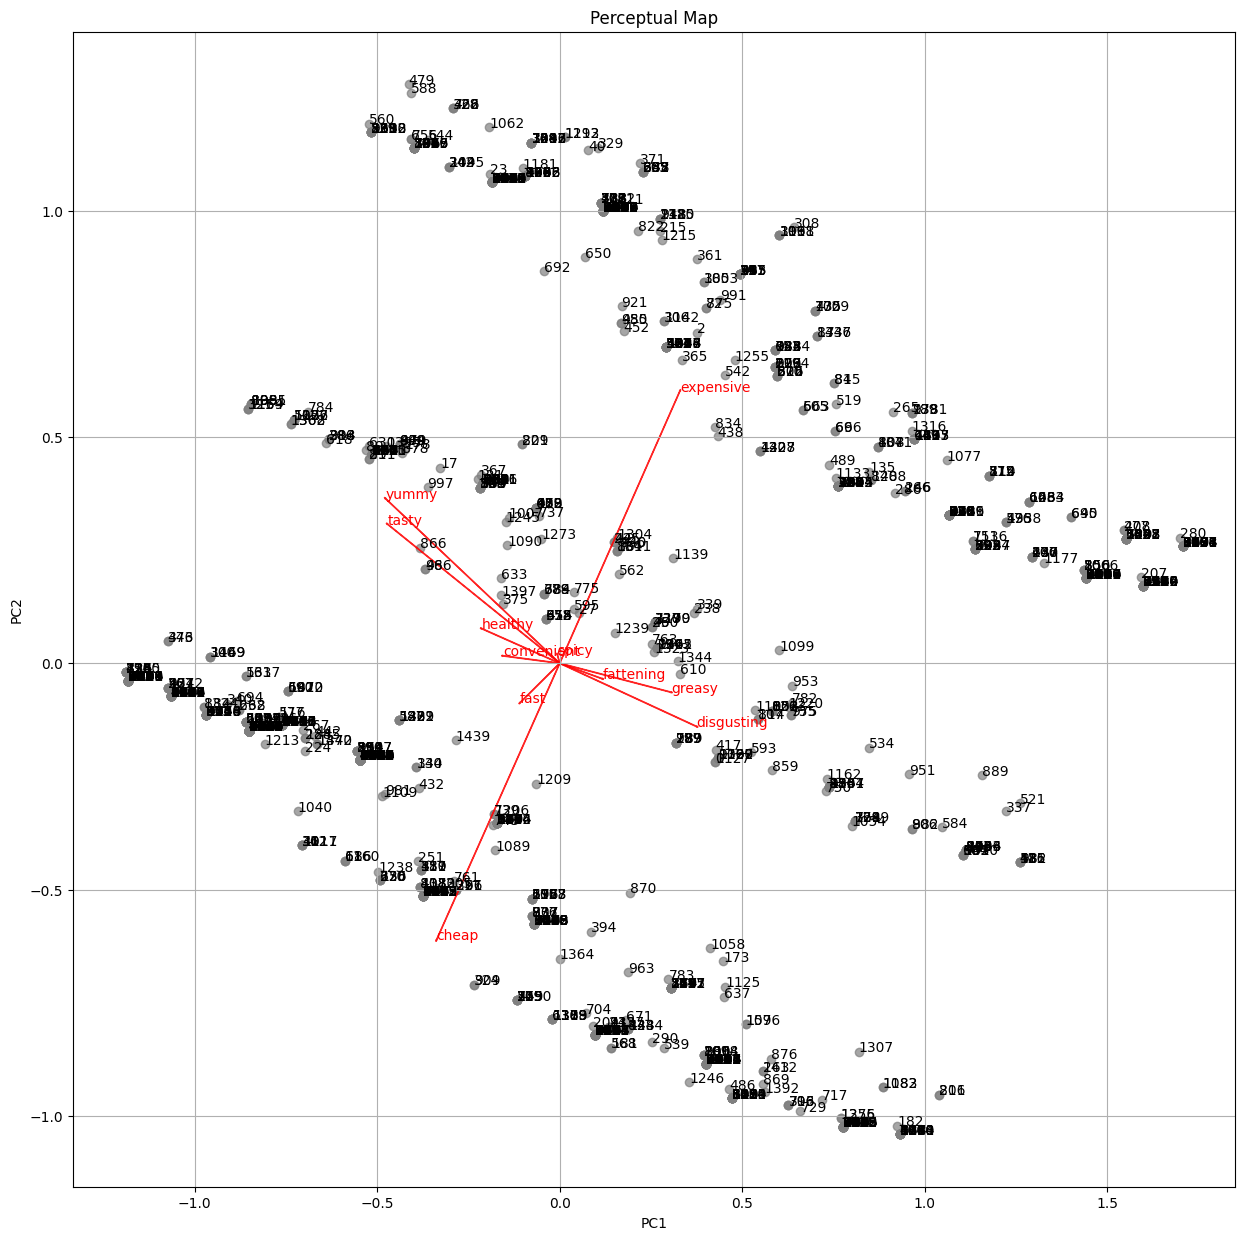

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA

# Assuming you already have the PCA results stored in df_pca_result and rotation_matrix

# Plot the first two principal components
plt.figure(figsize=(15,15))
plt.scatter(df_pca_result[:, 0], df_pca_result[:, 1], c='grey', alpha=0.7)

# Add labels for each point
for i, label in enumerate(df.index):
    plt.text(df_pca_result[i, 0], df_pca_result[i, 1], label)

# Add axis labels
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Perceptual Map')

# Plot the projection axes (rotation matrix)
for feature in rotation_matrix.index:
    plt.arrow(0, 0, rotation_matrix.loc[feature, 'PC1'], rotation_matrix.loc[feature, 'PC2'], color='red', alpha=0.8)
    plt.text(rotation_matrix.loc[feature, 'PC1'], rotation_matrix.loc[feature, 'PC2'], feature, color='red')

# Show the plot
plt.grid(True)
plt.show()




Extracting Segments

1)Using k-Means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

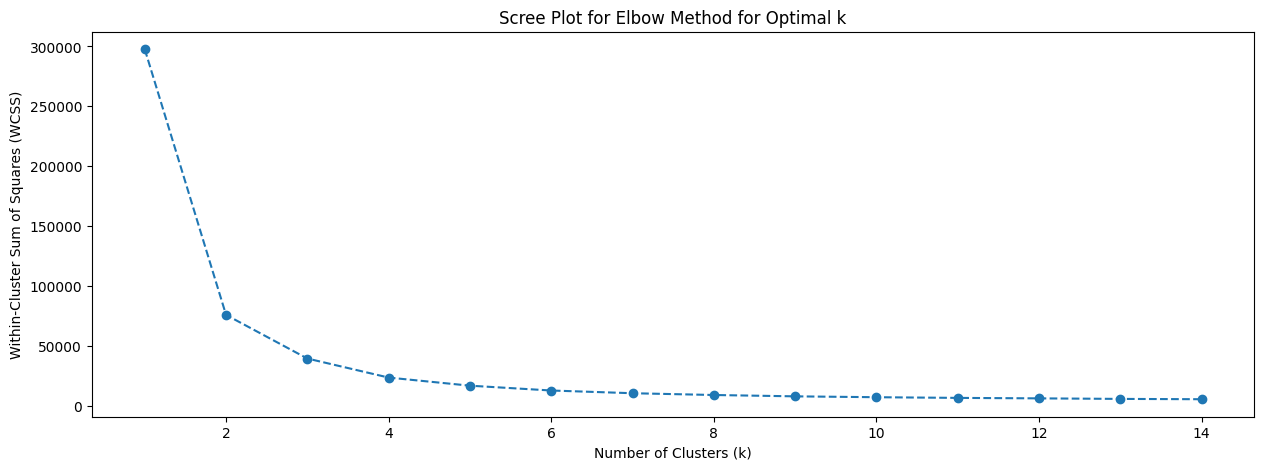

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the dataset
data_model = df.drop(['Gender'], axis=1)

# Calculate WCSS for different values of k
wcss = [] #store the within-cluster sum of squares (WCSS) for each value of k.
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_pca_input)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(15, 5))
plt.plot(range(1, 15), wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Scree Plot for Elbow Method for Optimal k")
plt.show()


However, a distinct elbow point, where the rate of decrease significantly slows down, is not evident in the plot. Unfortunately, this absence of a clear inflection point makes it challenging to identify an optimal number of market segments based on the elbow method. The plot does not offer decisive guidance for determining the most suitable number of clusters for segmenting the data.

The x-axis represents the number of clusters (k), and the y-axis represents the WCSS.
The plot helps to identify the "elbow" point where the decrease in WCSS slows down.

The goal is to choose the k value where the WCSS starts to decrease at a slower rate, suggesting diminishing returns in terms of explaining variance by adding more clusters.

In [ ]:
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Global Stability Analysis
global_stability = []
for k in range(2, 9):
    scores = []
    for _ in range(10):
        bootstrap_samples = [resample(df_pca_input) for _ in range(2 * 100)]
        kmeans_results = [KMeans(n_clusters=k).fit(sample) for sample in bootstrap_samples]
        labels = [result.labels_ for result in kmeans_results]
        scores.append(np.mean([adjusted_rand_score(labels[i], labels[j]) for i in range(2 * 100) for j in range(i + 1, 2 * 100)]))
    global_stability.append(scores)

# Plot Global Stability
plt.figure(figsize=(15, 5))
plt.boxplot(global_stability, labels=range(2, 9), vert=False)
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index')
plt.show()

# Segment Level Stability Across Solutions (SLSA) Plot


# Selection of Optimal Segmentation Solution
chosen_k = 4
chosen_solution = KMeans(n_clusters=chosen_k, n_init=10).fit(df_pca_input)

# Segment Level Stability Within Solutions (SLSW) Analysis
segment_stability = []
for i in range(chosen_k):
    segment_memberships = [chosen_solution.labels_]
    for _ in range(100):
        bootstrap_sample = resample(df_pca_input)
        kmeans_result = KMeans(n_clusters=chosen_k).fit(bootstrap_sample)
        segment_memberships.append(kmeans_result.labels_)
    segment_stability.append(np.mean([adjusted_rand_score(segment_memberships[0], segment_memberships[j]) for j in range(1, 101)]))

# Plot Segment Level Stability
plt.figure(figsize=(15, 5))
plt.plot(range(1, chosen_k + 1), segment_stability, marker='o')
plt.xlabel('Segment Number')
plt.ylabel('Segment Stability')
plt.ylim(0, 1)
plt.show()


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 177, in where
KeyboardInterrupt: 


**Global Stability Analysis**:The global stability analysis assesses how consistently the same segmentation solution emerges across multiple calculations with different random initializations and bootstrapped samples.
The stability is measured using the adjusted Rand index.
A boxplot is created to visualize the distribution of stability for each number of segments.

**Segment Level Stability Across Solutions (SLSA) Plot:**
The SLSA plot illustrates how segment memberships change when an additional market segment is added.
It helps assess segment-level stability across solutions with different numbers of segments.

**Selection of Optimal Segmentation Solution**:Based on the analysis, the four-segment solution is selected as a good segmentation solution.
A segment level stability within solutions (SLSW) analysis is performed to assess the stability of each market segment within the chosen solution.

**Visualization of Segment Level Stability:**A plot is created to show the stability of each segment within the chosen solution.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
import statsmodels.formula.api as smf

import pandas as pd

# Mapping ordinal values to numeric values
like_mapping = {
    'I LOVE IT!': 5,
    '+4': 4,
    '+3': 3,
    '+2': 2,
    '+1': 1,
    '0': 0,
    '-1': -1,
    '-2': -2,
    '-3': -3,
    '-4': -4,
    'I HATE IT!': -5
}

# Assuming 'LIKE' is the column name in your DataFrame
df['Like'] = df['Like'].map(like_mapping)

# Display the updated DataFrame
print(df['Like'])



0      -3.0
1       2.0
2       1.0
3       4.0
4       2.0
       ... 
1448    NaN
1449    2.0
1450    3.0
1451    4.0
1452   -3.0
Name: Like, Length: 1453, dtype: float64


In [ ]:
df.head()

In [ ]:
import pandas as pd
import statsmodels.api as sm



# Creating a design matrix
X = sm.add_constant(df[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']])
y = df['Like']

# Fitting the linear regression model
model = sm.OLS(y, X).fit()

# Displaying the summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   Like   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 20 Jan 2024   Prob (F-statistic):                nan
Time:                        09:11:44   Log-Likelihood:                    nan
No. Observations:                1453   AIC:                               nan
Df Residuals:                    1441   BIC:                               nan
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan        nan        nan        n

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

# Assuming 'mcdonalds' is your DataFrame, and 'model' is the fitted model from the previous code
# Replace these with your actual variable names

# Plotting regression coefficients
def plot_coefficients(model):
    coefficients = model.params
    p_values = model.pvalues

    # Extracting significant coefficients (assuming a significance level of 0.05)
    significant_coeffs = coefficients[p_values < 0.05]

    if significant_coeffs.empty:
        print("No significant coefficients to plot.")
        return

    # Plotting coefficients
    plt.figure(figsize=(10, 6))
    sns.barplot(x=significant_coeffs.index, y=significant_coeffs.values, color='darkgrey')

    # Adding confidence intervals (assuming 95% confidence)
    cis = model.conf_int().loc[significant_coeffs.index]
    plt.errorbar(x=significant_coeffs.index, y=significant_coeffs.values, yerr=cis.diff(axis=1).values / 2, fmt='none', color='k', capsize=5)

    plt.title('Significant Coefficients and Confidence Intervals')
    plt.xlabel('Perceptions of McDonald\'s')
    plt.ylabel('Coefficient Value')
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Displaying the plot
plot_coefficients(model)


No significant coefficients to plot.


Fitting Mixture of Regression Models and Assessing Model Significance

<ipython-input-17-3842feacea07>:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


                            OLS Regression Results                            
Dep. Variable:                   Like   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.248e+30
Date:                Sat, 20 Jan 2024   Prob (F-statistic):               0.00
Time:                        09:32:36   Log-Likelihood:                 45118.
No. Observations:                1453   AIC:                        -9.021e+04
Df Residuals:                    1441   BIC:                        -9.015e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.315e-15   1.32e-15     -2.506      0.0

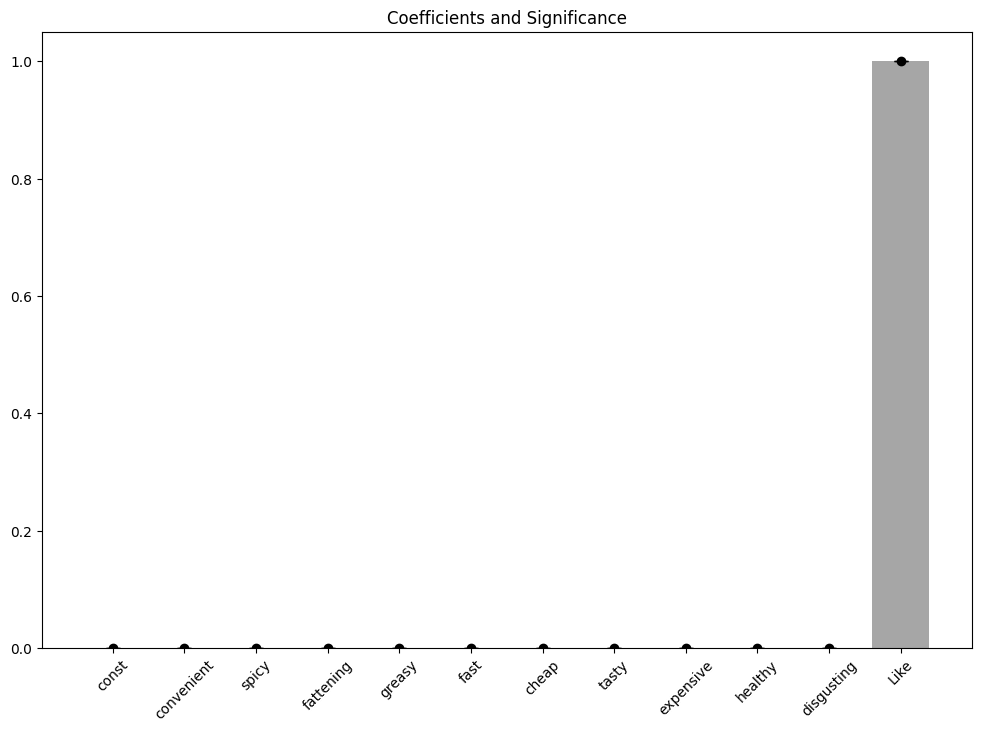

In [ ]:
import pandas as pd
from sklearn.mixture import GaussianMixture
import statsmodels.api as sm

# Assuming mcdonalds is a DataFrame with 'Like' column
df['Like'] = 6 - pd.to_numeric(df['Like'])
df.fillna(df.mean(), inplace=True)
# Building Regression Model Formula
independent_vars = "+".join(df.columns[1:12])  # Assuming columns 1 to 11 are the independent variables
formula = f"Like ~ {independent_vars}"

# Fitting Mixture of Regression Models
X = df[df.columns[1:12]]  # Assuming columns 1 to 11 are the independent variables
y = df['Like']

model = GaussianMixture(n_components=2, n_init=10, random_state=1234)
model.fit(X)

# Assessing Model Significance
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Print parameter estimates and significance
print(model.summary())

# Plotting coefficients with significance indicators
import matplotlib.pyplot as plt

# Plotting coefficients with significance indicators
plt.figure(figsize=(12, 8))

# Plot coefficients for the first segment
plt.bar(range(len(model.params)), model.params, color='gray', alpha=0.7)
plt.errorbar(
    range(len(model.params)),
    model.params,
    yerr=model.conf_int()[1] - model.params,
    fmt='o',
    color='black',
    capsize=5
)
plt.title('Coefficients and Significance')
plt.xticks(range(len(model.params)), model.params.index, rotation=45)
plt.show()



In [ ]:
import pandas as pd
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

# Assuming X is your DataFrame with attributes
# Assuming MD_k4 is your KMeans model with 4 clusters

# Perform hierarchical clustering on attributes
MD_vclust = linkage(df_pca_input.T, method='complete', metric='euclidean')

# Create a segment profile plot using bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=kmeans, shade=True, order=MD_vclust['leaves'])
plt.show()

# Perform Principal Components Analysis (PCA)
pca = PCA(n_components=2)
MD_pca = pca.fit_transform(X)

# Create a segment separation plot using scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel("principal component 1")
plt.ylabel("principal component 2")
plt.show()


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

<Figure size 1200x800 with 0 Axes>

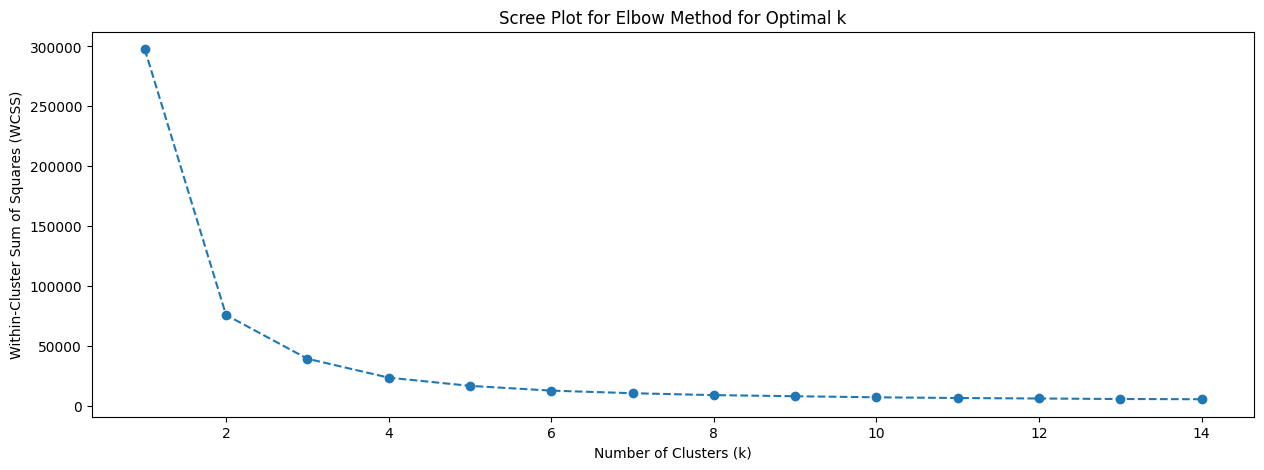

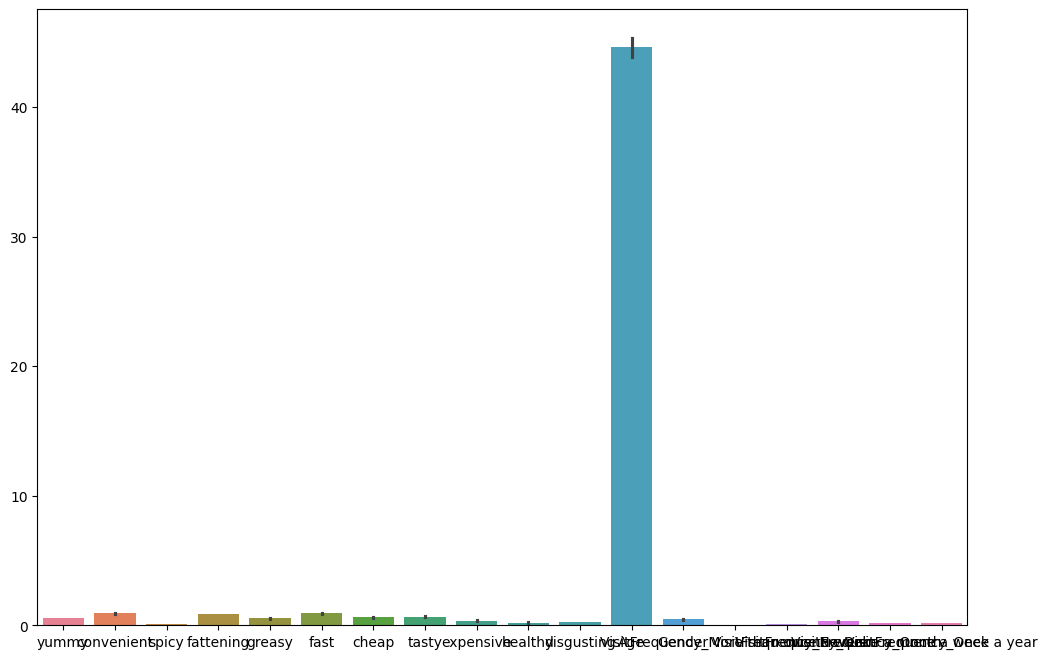

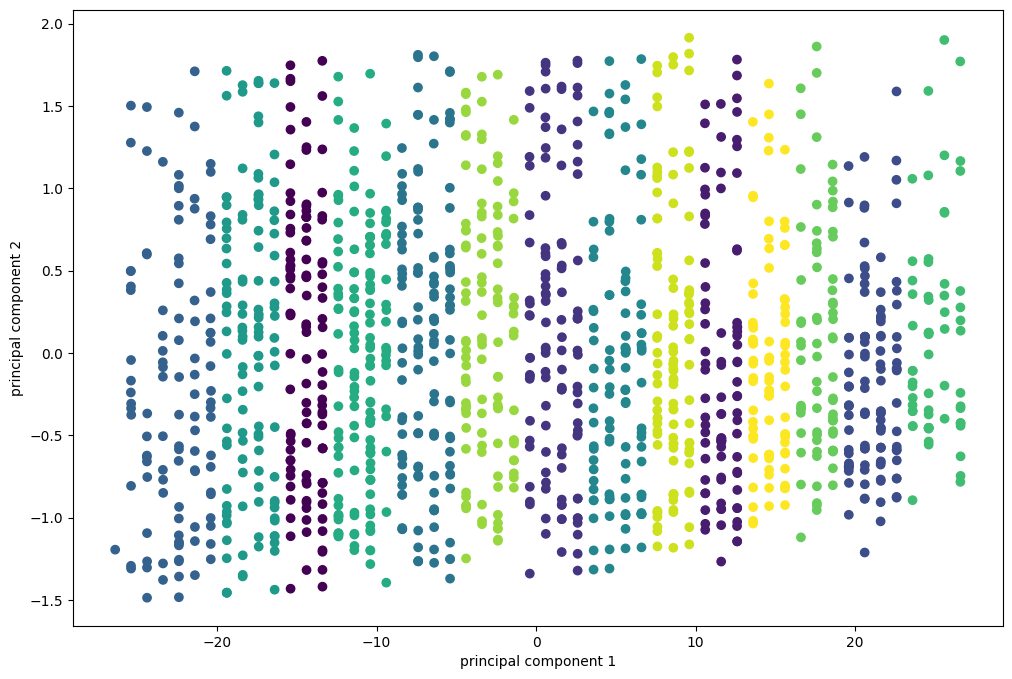

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.cluster.hierarchy import linkage
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Assuming 'df' is your DataFrame with the dataset
data_model = df.drop(['Gender'], axis=1)

# Calculate WCSS for different values of k
wcss = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_pca_input)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(15, 5))
plt.plot(range(1, 15), wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Scree Plot for Elbow Method for Optimal k")
plt.show()

# Perform hierarchical clustering on attributes
MD_vclust = linkage(df_pca_input.T, method='complete', metric='euclidean')

# Create a segment profile plot using bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=df_pca_input)
plt.show()

# Perform Principal Components Analysis (PCA)
pca = PCA(n_components=2)
MD_pca = pca.fit_transform(df_pca_input)

# Create a segment separation plot using scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel("principal component 1")
plt.ylabel("principal component 2")
plt.show()


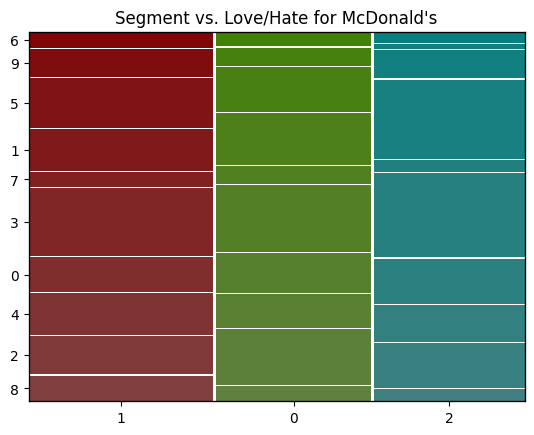

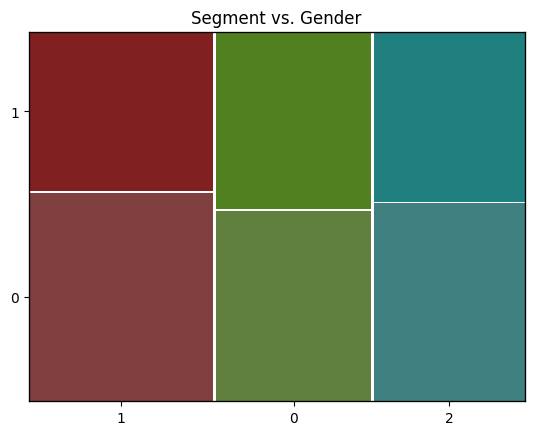

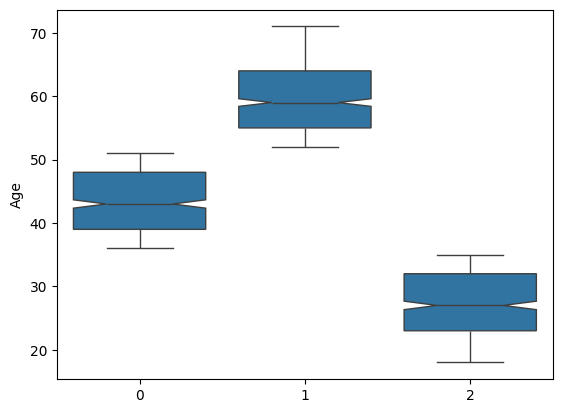

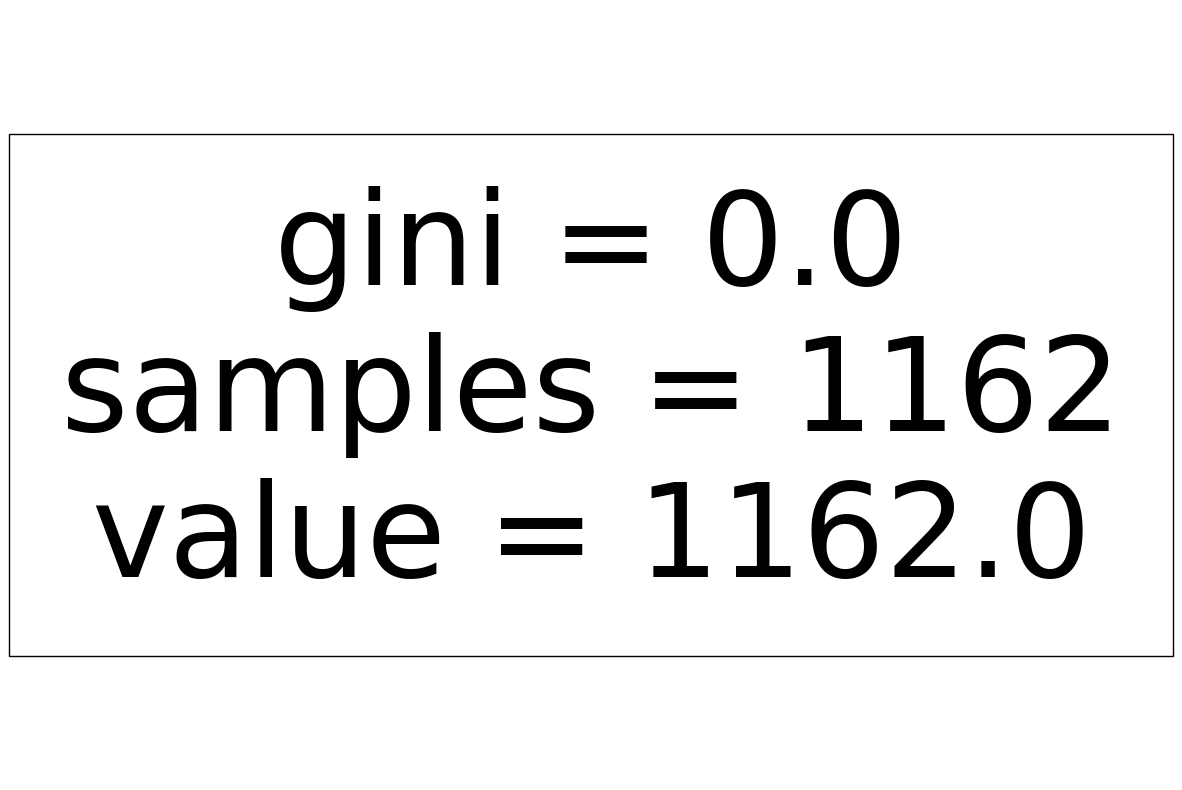

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label encode the 'VisitFrequency' column
df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])

# Continue with your existing code...

# Assuming k4 is your KMeans model
k4_labels = k4.labels_

# Step 1: Association Between Segment Membership and Love/Hate for McDonald's
mosaic_df = pd.DataFrame({'Segment': k4_labels, 'Like': df['Like']})
mosaic(mosaic_df, ['Segment', 'Like'], title='Segment vs. Love/Hate for McDonald\'s', labelizer=lambda k: '')
plt.show()

# Step 2: Gender Distribution Across Segments
mosaic_df_gender = pd.DataFrame({'Segment': k4_labels, 'Gender': df['Gender']})
mosaic(mosaic_df_gender, ['Segment', 'Gender'], title='Segment vs. Gender', labelizer=lambda k: '')
plt.show()

# Step 3: Association Between Age and Segment Membership
sns.boxplot(x=k4_labels, y=df['Age'], notch=True)
plt.show()

# Step 4: Predicting Segment Membership Using Descriptor Variables
X = df[['Like', 'Age', 'VisitFrequency', 'Gender']]
y = (k4_labels == 3).astype(int)  # Binary classification for segment 3 membership

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Visualize the decision tree (assuming it's small)
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=X.columns, class_names=['Not Segment 3', 'Segment 3'], filled=True)
plt.show()


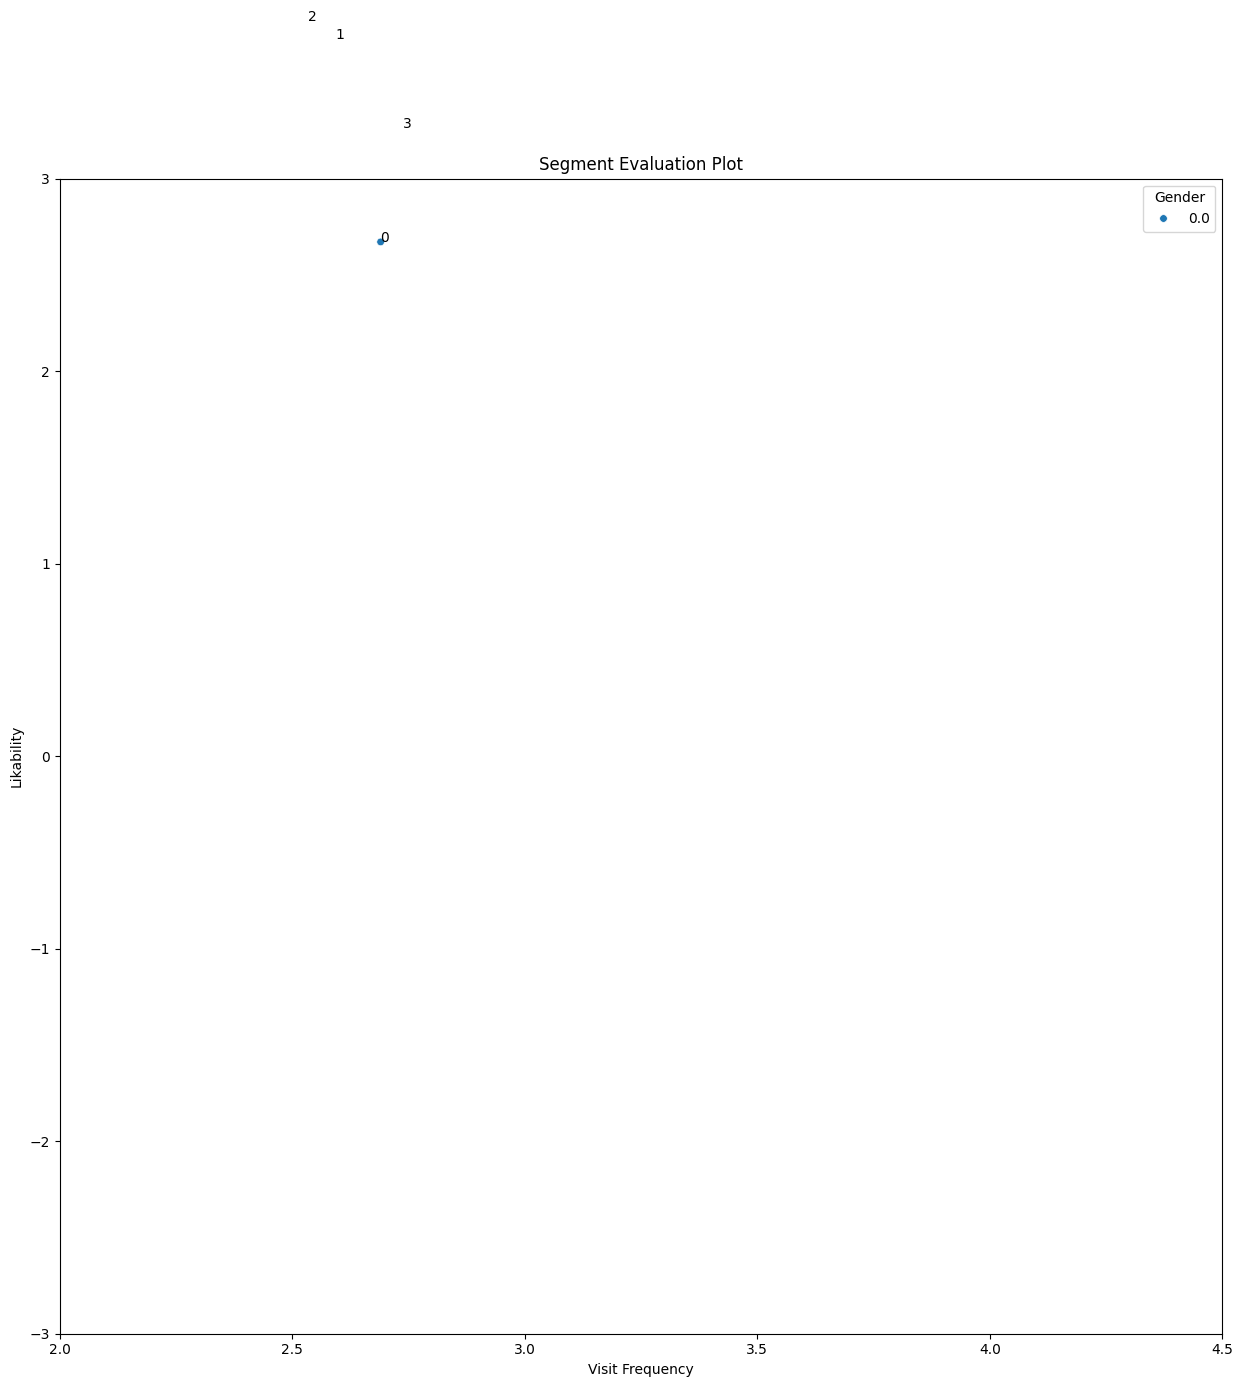

In [ ]:
# Assuming 'df' is your DataFrame with the dataset
from sklearn.cluster import KMeans

# Perform K-means clustering and add labels to the DataFrame
kmeans = KMeans(n_clusters=4, random_state=42)
df['Segment'] = kmeans.fit_predict(df[['Like', 'Age', 'VisitFrequency', 'Gender']])

# Step 1: Compute mean values for each segment
visit_mean = df.groupby('Segment')['VisitFrequency'].mean()
like_mean = df.groupby('Segment')['Like'].mean()
female_mean = df.groupby('Segment')['Gender'].apply(lambda x: (x == 'Female').mean())

# Step 2: Create the segment evaluation plot
plt.figure(figsize=(15,15))
sns.scatterplot(x=visit_mean, y=like_mean, size=female_mean * 10, sizes=(30, 300))
plt.xlim(2, 4.5)
plt.ylim(-3, 3)
plt.title('Segment Evaluation Plot')
plt.xlabel('Visit Frequency')
plt.ylabel('Likability')
for i, txt in enumerate(visit_mean.index):
    plt.text(visit_mean[txt], like_mean[txt], str(txt))
plt.show()
